In [43]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [328]:
import sys
# input_data = '/Users/simon/University of Glasgow/Vinny Davies - CLDS Metabolomics Project/Data/Fusion_1578_Ronan_Daly_CLP_pHILIC_22May19/Positive/fragmentation/mzML/QCB_N10_DEW015.mzML'
input_data = '/Users/simon/Dropbox/BioResearch/Meta_clustering/MS2LDA/multifile_ms2lda_manuscript/Supporting_Files/data/urines/Urine_StrokeDrugs_02_T10_POS.mzML'
batch_file = '/Users/simon/git/pymzm/purity/purity_batch.xml'
output_folder = '/Users/simon/git/pymzm/purity/output'

Note to self: this currently ony takes the first 30 seconds or so from the chromatogram

In [329]:
from mzmine import pick_peaks

In [330]:
input_files = [input_data]
pick_peaks(input_files,xml_template = batch_file,output_dir = output_folder,force = False)

Creating xml batch file for Urine_StrokeDrugs_02_T10_POS.mzML
Running mzMine for Urine_StrokeDrugs_02_T10_POS.mzML


In [275]:
import os
# load the boxes
from ms2_matching import load_picked_boxes
box_csv_file = os.path.join(output_folder,input_data.split(os.sep)[-1].split('.')[0] + '_box.csv')
boxes = load_picked_boxes(box_csv_file)

['row ID', 'row m/z', 'row retention time', 'QCB_N10_DEW015.mzML filtered Peak m/z', 'QCB_N10_DEW015.mzML filtered Peak RT start', 'QCB_N10_DEW015.mzML filtered Peak RT end', 'QCB_N10_DEW015.mzML filtered Peak m/z min', 'QCB_N10_DEW015.mzML filtered Peak m/z max', '']


In [331]:
# load the mzml file
from ms2_matching import MZMLFile
mzml_file = MZMLFile(input_data)

Loaded 10075 scans


In [277]:
# map the boxes to the scans
from ms2_matching import map_boxes_to_scans
s2b,b2s = map_boxes_to_scans(mzml_file,boxes,half_isolation_window=0.75)
print("{} scans mapped to boxes".format(len(s2b)))
print("{} boxes mapped to scans".format(len(b2s)))

4764 scans mapped to boxes
2130 boxes mapped to scans


In [315]:
# find a box that has > 1 scan
from ms2_matching import traverse_boxes_scans
min_count = 2
b2scount = [(b,len(s)) for b,s in b2s.items()]
b2scount = list(filter(lambda x: x[1] >= min_count,b2scount))
print(len(b2scount))
pos = 1200
box = b2scount[pos][0]
scan = b2s[box][0]
subset_scans,subset_boxes = traverse_boxes_scans(b2s,s2b,scan)

1454


In [374]:
# subset_scans = [mzml_file.scans[2217],mzml_file.scans[2436],mzml_file.scans[2455],mzml_file.scans[2664]]
# # 2217,2436
# # 2455,2664

subset_scans = [mzml_file.scans[2783],mzml_file.scans[2795],mzml_file.scans[2923],mzml_file.scans[2914]]

subset_scans = [mzml_file.scans[i] for i in [1898, 1815, 1947, 1686, 1816, 1949]]


subset_scans = list(filter(lambda x: x.ms_level == 2 and x.rt_in_minutes > 735/60 
                      and x.rt_in_minutes < 775/60 
                      and x.precursor_mz > 229.11 and x.precursor_mz < 229.16, mzml_file.scans))


In [375]:
print(len(subset_scans))
print(len(subset_boxes))

7
3


In [376]:
import pylab as plt
%matplotlib inline
import numpy as np

In [377]:
for s in subset_scans:
    print(s.scan_no)

5208
5220
5332
5340
5396
5455
5461


In [378]:
from ms2_matching import interpolate_ms1_intensities,simple_align
s = list(subset_scans)[0]
p = interpolate_ms1_intensities(s,s.previous_ms1,s.next_ms1,half_isolation_width=0.35)
peak_sets = {}
for mz,i in p:
    peak_sets[mz] = [(s,mz,i)]
for s in list(subset_scans)[1:]:
    a = interpolate_ms1_intensities(s,s.previous_ms1,s.next_ms1)
    simple_align(peak_sets,a,s,ppm=10)


In [379]:
print(peak_sets)

{229.12971: [(<ms2_matching.MZMLScan object at 0x145f17090>, 229.12971, 300899.3113603603)], 228.9016876220703: [(<ms2_matching.MZMLScan object at 0x145f17090>, 228.90171813964844, 1003396.5911743384), (<ms2_matching.MZMLScan object at 0x1309857d0>, 228.9016571044922, 1088058.4299199863)], 229.07939453125: [(<ms2_matching.MZMLScan object at 0x140d90e90>, 229.0792236328125, 211696.55681816977), (<ms2_matching.MZMLScan object at 0x146060610>, 229.07940673828125, 337608.03482504946), (<ms2_matching.MZMLScan object at 0x145f17090>, 229.0794677734375, 2042346.6367615345), (<ms2_matching.MZMLScan object at 0x1309857d0>, 229.07940673828125, 2626846.141927123), (<ms2_matching.MZMLScan object at 0x142e39d90>, 229.0794677734375, 1372104.986844316)], 229.00584106445314: [(<ms2_matching.MZMLScan object at 0x140d90e90>, 229.00555419921875, 365034.15729316184), (<ms2_matching.MZMLScan object at 0x146060610>, 229.00576782226562, 137257.66921475163), (<ms2_matching.MZMLScan object at 0x145f17090>, 229

229.12971
228.9016876220703
229.07939453125
229.00584106445314
229.20922088623047
229.02559916178384
229.1181902204241
229.15452575683594
229.1407209123884
229.1908721923828
[229.12971, 228.9016876220703, 229.07939453125, 229.00584106445314, 229.20922088623047, 229.02559916178384, 229.1181902204241, 229.15452575683594, 229.1407209123884, 229.1908721923828]
[229.12971, 228.9016876220703, 229.07939453125, 229.00584106445314, 229.20922088623047, 229.02559916178384, 229.1181902204241, 229.15452575683594, 229.1407209123884, 229.1908721923828]


([<matplotlib.axis.YTick at 0x141859750>,
 <a list of 7 Text yticklabel objects>)

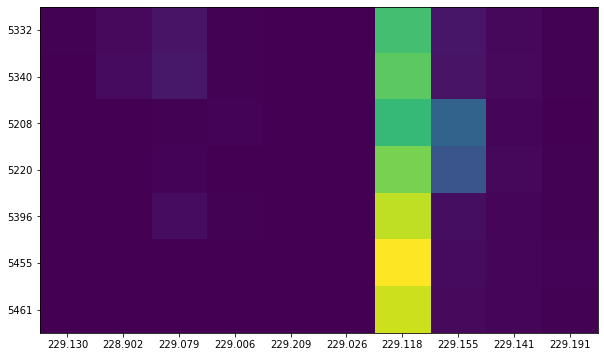

In [380]:
s_idx = {}
s_pos = 0
mz_idx = {}
mz_pos = 0
data = []
for mz,peaksets in peak_sets.items():
    print(mz)
    mz_idx[mz] = mz_pos
    mz_pos += 1
    for scan,internal_mz,intensity in peaksets:
        if not scan in s_idx:
            s_idx[scan] = s_pos
            s_pos += 1
        data.append((s_idx[scan],mz_idx[mz],intensity))
from scipy.sparse import coo_matrix
i,j,k = zip(*data)
cm = np.array(coo_matrix((k,(i,j))).todense())
plt.figure(figsize=(10,6))
plt.imshow(cm,aspect='auto')

mzi = list(zip(mz_idx.keys(),mz_idx.values()))
mzi.sort(key = lambda x: x[1])
sorted_mz,_ = zip(*mzi)
sorted_mz = list(sorted_mz)
print(sorted_mz)

szi = list(zip(s_idx.keys(),s_idx.values()))
reverse_s_idx = {v:k for k,v in s_idx.items()}
szi.sort(key = lambda x: x[1])
sorted_s,_ = zip(*szi)
sorted_s = list(sorted_s)
print(sorted_mz)
plt.xticks(range(len(sorted_mz)),["{:.3f}".format(m) for m in sorted_mz])
plt.yticks(range(len(sorted_s)),[s.scan_no for s in sorted_s])

5208 229.15 739.323
5220 229.118124805191 740.807
5332 229.15 756.336
5340 229.118243914092 757.412
5396 229.14 764.798
5455 229.15 772.372
5461 229.12 773.156


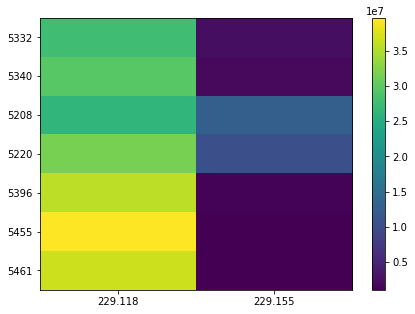

In [381]:
# Filter out the bad stuff
maxi = cm.max(axis=0)
# print(maxi)
# remove columns that don't have at least a max of 20% of the max max!
rmax = maxi/maxi.max()
pos = np.where(rmax >= 0.2)[0]
# only keep pos
n_scans,n_ms1 = cm.shape
new_cm = np.zeros((n_scans,len(pos)))
new_ms1_index = {}
new_ms1_pos = 0
reverse_mz_idx = {v:k for k,v in mz_idx.items()}
for p in pos:
    mz_val = reverse_mz_idx[p]
#     print(mz_val)
    new_ms1_index[mz_val] = new_ms1_pos
    new_cm[:,new_ms1_pos] = cm[:,p]
    new_ms1_pos += 1
plt.figure(figsize=(7,5))
plt.imshow(new_cm,aspect='auto')
new_reverse_mz_idx = {v:k for k,v in new_ms1_index.items()}
plt.xticks(range(len(new_reverse_mz_idx)),["{:.3f}".format(new_reverse_mz_idx[v]) for v in range(len(new_reverse_mz_idx))])
plt.yticks(range(len(s_idx)),[reverse_s_idx[v].scan_no for v in range(len(s_idx))])
plt.colorbar()

for s in subset_scans:
    print(s.scan_no,s.precursor_mz,60*s.rt_in_minutes)

([<matplotlib.axis.YTick at 0x13c1d98d0>,
 <a list of 7 Text yticklabel objects>)

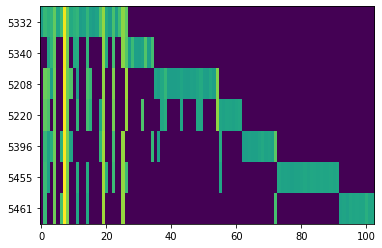

In [382]:
n_dp = 3
data = []
frag_idx = {}
frag_pos = 0
for s,pos in s_idx.items():
    for mz,intensity in s.peaks:
        round_mz = round(mz,n_dp)
        if not round_mz in frag_idx:
            frag_idx[round_mz] = frag_pos
            frag_pos += 1
        data.append((s_idx[s],frag_idx[round_mz],intensity))
i,j,k = zip(*data)
frag_mat = np.array(coo_matrix((k,(i,j))).todense())
plt.imshow(np.log(frag_mat+1),aspect='auto')
plt.yticks(range(len(sorted_s)),[s.scan_no for s in sorted_s])


In [388]:
from ms2_matching import deconvolve
out_mat = deconvolve(new_cm,frag_mat,frag_idx)
s = out_mat.sum(axis=1)
out_mat/=s[:,None]

Looks nasty, scared
21 pairs of observations (of 21.0) have correlation > 0.75
[[27807645.12180899  2428750.64314366]
 [29697151.87500047  2054290.50279018]
 [26535579.38636331 12669646.44318193]
 [31697111.34051139 10475885.72409164]
 [35878096.05648959  1451055.60247142]
 [39681305.14151758  1161612.66150318]
 [36685872.31319921  1036061.83533741]]


([<matplotlib.axis.YTick at 0x13c25d6d0>,
 <a list of 2 Text yticklabel objects>)

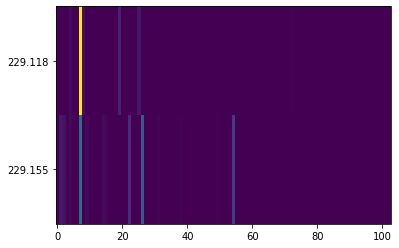

In [387]:
plt.imshow(out_mat,aspect='auto')
mz_vals = ["{:.3f}".format(new_reverse_mz_idx[i]) for i in range(len(new_reverse_mz_idx))]
plt.yticks(range(len(mz_vals)),mz_vals)

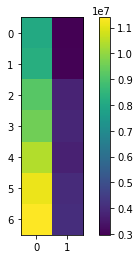

In [385]:
reconstruction = np.dot(frag_mat,out_mat.T)
plt.imshow(reconstruction)
plt.colorbar()

In [299]:
print(mzml_file.scans[7890].peaks)
print(mzml_file.scans[7828].peaks)
print(mzml_file.scans[8116].peaks)

[array([   77.44525146, 12171.64453125]), array([  104.10683441, 86332.8515625 ]), array([  104.48631287, 11874.359375  ]), array([  105.11061859, 17697.5546875 ]), array([  106.11139679, 28756.34765625]), array([  260.11062622, 15484.35449219])]
[array([  104.10671234, 50816.48828125]), array([  128.07087708, 14158.37207031]), array([  164.74369812, 11504.09765625]), array([  242.10159302, 15590.55859375]), array([  260.10760498, 16609.86523438])]
[array([5.21953316e+01, 4.64703062e+05]), array([6.00807686e+01, 6.88177625e+05]), array([8.60961838e+01, 2.14610825e+06]), array([9.25245056e+01, 5.31862625e+05]), array([1.0410688e+02, 3.1969908e+07]), array([1.04931931e+02, 6.37596438e+05]), array([1.24999680e+02, 2.64561775e+06]), array([1.73424438e+02, 6.92196062e+05]), array([1.80342957e+02, 5.80524375e+05]), array([1.84074326e+02, 2.94443675e+06]), array([2.58111481e+02, 1.04460281e+06])]
